In [1]:
from lblcrn.homogenous_crn.solution import *
from lblcrn.homogenous_crn.sym import *
from lblcrn.homogenous_crn.xps import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid


In [2]:
# 1e-6_rt
sols = []
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0), {0:1.0000})
x2 = sm.sp('x2', Orbital('1s', 532.2), {0:0})
x3 = sm.sp('x3', Orbital('1s', 530.9), {0:0})
x4 = sm.sp('x4', Orbital('1s', 530.0), {0:0.25})
x53 = sm.sp('x53', Orbital('1s', 531.6), {0:0})
x54 = sm.sp('x54', Orbital('1s', 531.6), {0:0})
x6 = sm.sp('x6', Orbital('1s', 533.2), {0:0})
x7 = sm.sp('x7', Orbital('1s', 535.0), {0:0})

multipliers = [0.1, 0.5, 1, 5, 10]
default_rxn_consts = [3.207654, 1.363342, 6.220646, 0.160755, 0.299507, 0.167130, 1.939313, 0.515646, 0.733491, 0.311754, 1.038423, 0.962999, 0.002342,426.922895]

# System Solving
This only needs to be run if a pickled solution is not available.

In [ ]:
# Test code that will be moved into a module
for i in range(len(default_rxn_consts)):
    for j in range(5):
        scaled = list(default_rxn_consts)
        scaled[i] *= multipliers[j]
        
        rsys = RxnSystem(
            Rxn(x4 + y1, x54, scaled[0]), # 0
            Rxn(x3 + y1, x53, scaled[1]), # 1
            Rxn(x54, x3 + x3, scaled[2]), # 2
            Rxn(x3 + x3, x54, scaled[3]), # 3
            Rxn(x53, x2 + x3, scaled[4]), # 4
            Rxn(x54, x2 + x4, scaled[5]), # 5
            Rxn(x2, y1, scaled[6]), # 6
            Rxn(y1, x2, scaled[7]), # 7
            Rxn(x53, y1 + x3, scaled[8]), # 8
            Rxn(x54, x4 + y1, scaled[9]), # 9
            Rxn(x53 + y1, x6, scaled[10]), # 10
            Rxn(x6, x53 + y1, scaled[11]), # 11
            Rxn(x4 + x4, x7, scaled[12]), # 12
            Rxn(x7, x4 + x4, scaled[13]), # 13
            sm
        )
        s = solve(rsys, time=10000)
        sols.append(s)
        print('Solved for ('+str(i)+', '+str(j)+')')
        print(scaled)
        print('\n')

In [ ]:
sols[0].basic_plot()

In [ ]:
import pickle
with open('../nickel_constsv2_noexp.pkl', 'wb') as f:
    pickle.dump(sols, f)

In [ ]:
x = read_new_data('../data/1e-6_rt.txt')
j = 0
for i, s in enumerate(sols):
    print('Const: '+str(int(i / len(multipliers)))+' Multiplier: '+str(multipliers[j]))
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])

In [ ]:
import pickle
with open('../nickel_consts.pkl', 'wb') as f:
    pickle.dump(sols, f)

# Analysis

In [3]:
sols = pickle.load(open('../data/nickel_constsv2_noexp.pkl', 'rb'))

In [4]:
x = read_new_data('../data/ag_1e-5_25.txt', be=1)
j = 0
for i, s in enumerate(sols):
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])

In [5]:
len(sols[0].distributions)

0

In [6]:
for s in sols:
    s.ignore = [y1]
    s.process()

In [7]:
print(len(sols[0].xps.intensity))
print(sols[0].resampled_binding_energies)
print(len(sols[0].envelope))
print(sols[0].envelope)

131
[525.39 525.49 525.59 525.69 525.79 525.89 525.99 526.09 526.19 526.29
 526.39 526.49 526.59 526.69 526.79 526.89 526.99 527.09 527.19 527.29
 527.39 527.49 527.59 527.69 527.79 527.89 527.99 528.09 528.19 528.29
 528.39 528.49 528.59 528.69 528.79 528.89 528.99 529.09 529.19 529.29
 529.39 529.49 529.59 529.69 529.79 529.89 529.99 530.09 530.19 530.29
 530.39 530.49 530.59 530.69 530.79 530.89 530.99 531.09 531.19 531.29
 531.39 531.49 531.59 531.69 531.79 531.89 531.99 532.09 532.19 532.29
 532.39 532.49 532.59 532.69 532.79 532.89 532.99 533.09 533.19 533.29
 533.39 533.49 533.59 533.69 533.79 533.89 533.99 534.09 534.19 534.29
 534.39 534.49 534.59 534.69 534.79 534.89 534.99 535.09 535.19 535.29
 535.39 535.49 535.59 535.69 535.79 535.89 535.99 536.09 536.19 536.29
 536.39 536.49 536.59 536.69 536.79 536.89 536.99 537.09 537.19 537.29
 537.39 537.49 537.59 537.69 537.79 537.89 537.99 538.09 538.19 538.29
 538.39]
131
[1.200758117618009e-22, 1.1360080258510407e-21, 1.0230590261

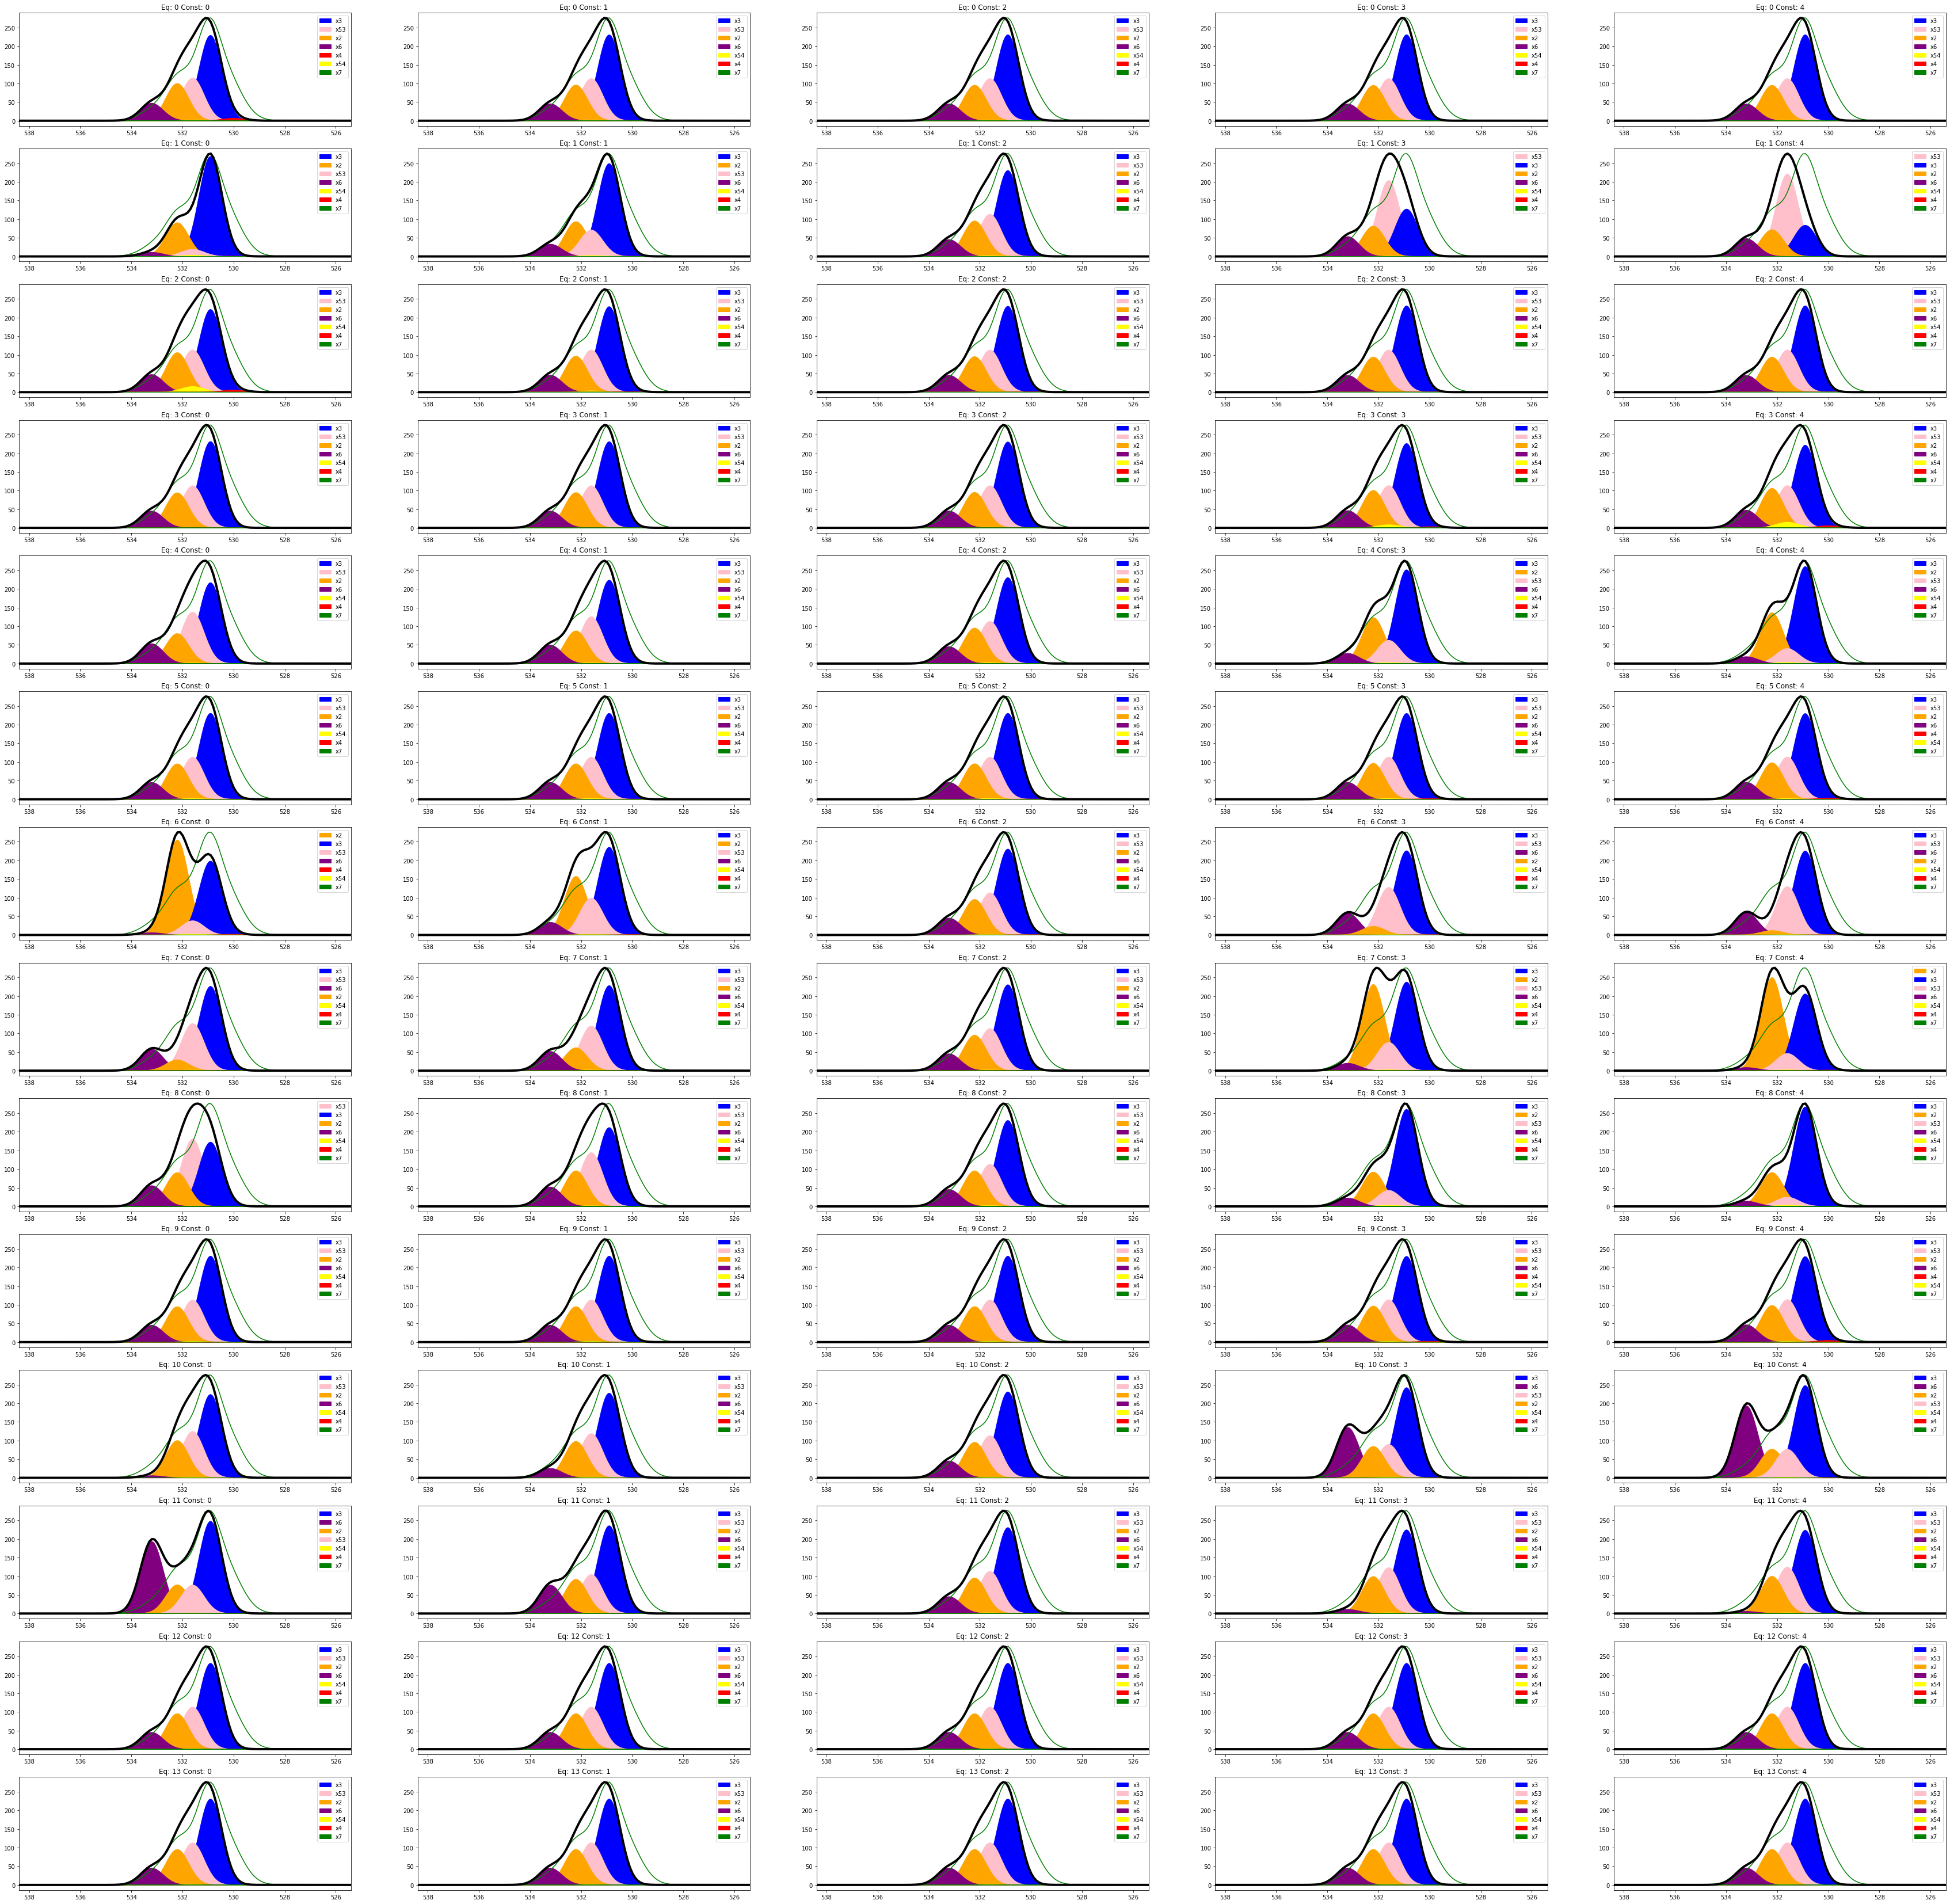

In [8]:
fig, axes = plt.subplots(nrows=14, ncols=5, figsize=(60,60))
for i in range(len(sols)):
    sols[i].plot_gaussian(envelope=True, resample_envelope=True, overlay=True, ax=axes[int(i/5), int(i%5)], title=('Eq: ' + str(int(i/5)) + ' Const: ' + str(i % 5)))
plt.show()

## RMSE Comparison

In [9]:
rmses_list = []
for i in range(len(default_rxn_consts)):
    rmses_list.append([])
    for j in range(5):
        rmses_list[i].append(sols[i*5 + j].rmse())
rmses = pd.DataFrame(rmses_list, columns=['0.1', '0.5', '1', '5', '10'])
rmses

,0.1,0.5,1,5,10
0,25.101218,25.588198,25.661446,25.722149,25.729750
1,22.943199,21.633267,25.661446,42.118752,48.033344
2,27.625724,25.865671,25.661446,25.503400,25.484075
3,25.484086,25.562090,25.661446,26.507912,27.625708
4,28.031232,26.804413,25.661446,22.350432,21.765627
5,25.680005,25.671817,25.661446,25.583861,25.497297
6,43.568416,31.106632,25.661446,26.514061,27.390772
7,26.114416,24.970871,25.661446,41.185461,42.690296
8,36.563716,30.302484,25.661446,21.276722,22.355695
9,25.705740,25.685752,25.661446,25.477707,25.273632


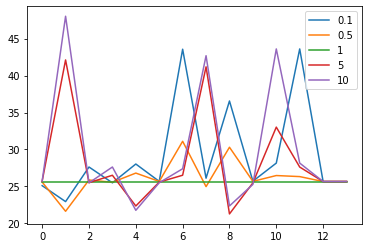

In [10]:
rmses.plot()

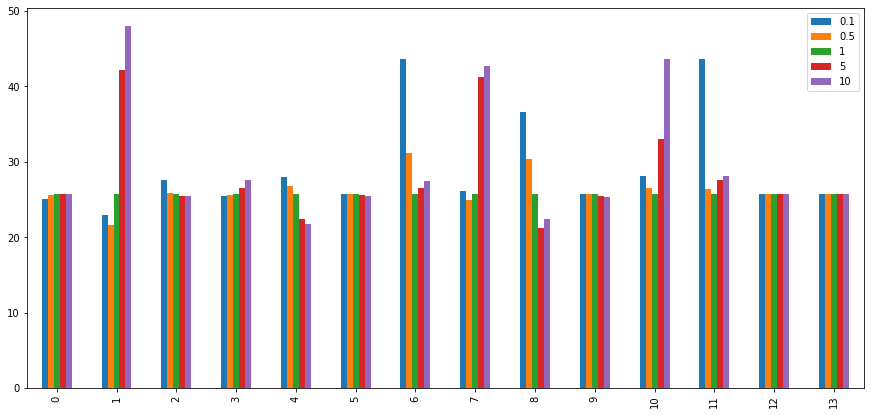

In [11]:
rmses.plot.bar(figsize=(15,7))

In [12]:
rmses_min = rmses.agg(['min', 'idxmin']).T
rmses_min

,min,idxmin
0.1,22.943199,1.0
0.5,21.633267,1.0
1,25.661446,0.0
5,21.276722,8.0
10,21.765627,4.0


1, 0.1


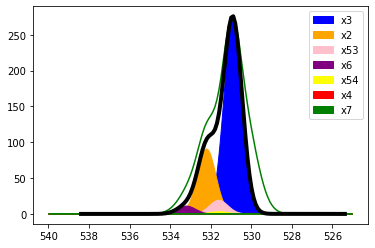

0, 1


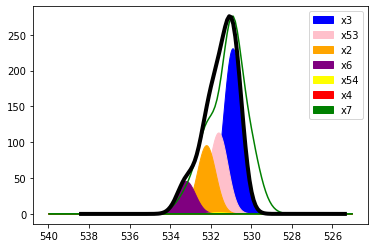

4, 10


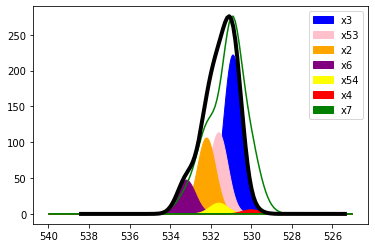

In [13]:
print('1, 0.1')
sols[5].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
print('0, 1')
sols[2].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
print('4, 10')
sols[19].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)

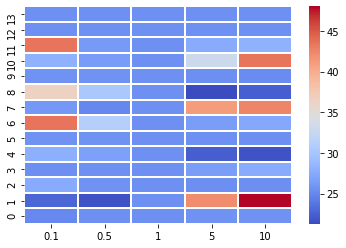

In [14]:
rmse_heatmap = sb.heatmap(rmses, cmap='coolwarm', linewidths=1)
rmse_heatmap.invert_yaxis()

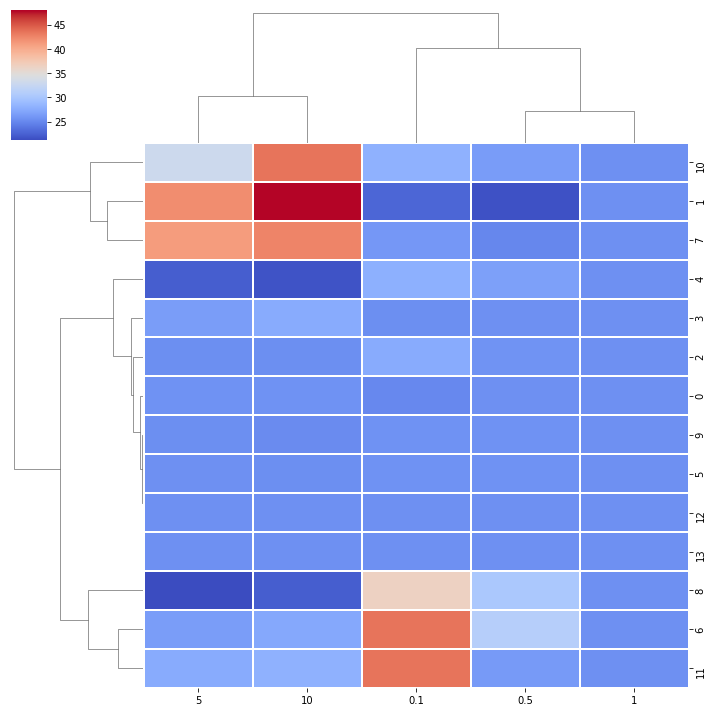

In [15]:
rmse_clustermap = sb.clustermap(rmses, cmap='coolwarm', linewidths=1)

## MAE Comparison

In [16]:
maes_list = []
for i in range(len(default_rxn_consts)):
    maes_list.append([])
    for j in range(5):
        maes_list[i].append(sols[i*5 + j].mae())
maes = pd.DataFrame(maes_list, columns=['0.1', '0.5', '1', '5', '10'])
maes

,0.1,0.5,1,5,10
0,12.576755,12.424955,12.409098,12.400229,12.399407
1,11.875423,8.924736,12.409098,20.873508,22.805085
2,14.149410,12.629655,12.409098,12.246243,12.225787
3,12.225789,12.307055,12.409098,13.251820,14.149406
4,13.957747,13.162935,12.409098,9.884345,9.721260
5,12.400026,12.403755,12.409098,12.458424,12.524916
6,22.350894,15.688761,12.409098,13.710377,14.290968
7,13.443468,12.276904,12.409098,19.817139,21.636044
8,18.757073,15.484651,12.409098,9.422613,11.233337
9,12.401925,12.404203,12.409098,12.457701,12.520335


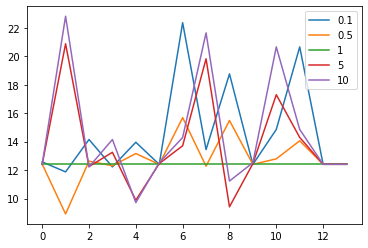

In [17]:
maes.plot()

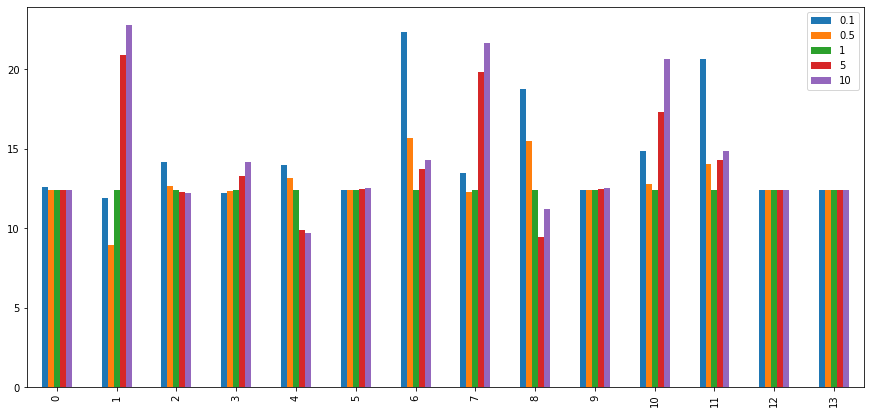

In [18]:
maes.plot.bar(figsize=(15,7))

In [19]:
maes_min = maes.agg(['min', 'idxmin']).T
maes_min

,min,idxmin
0.1,11.875423,1.0
0.5,8.924736,1.0
1,12.409098,0.0
5,9.422613,8.0
10,9.721260,4.0


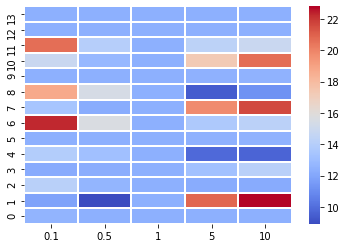

In [20]:
mae_heatmap = sb.heatmap(maes, cmap='coolwarm', linewidths=1)
mae_heatmap.invert_yaxis()

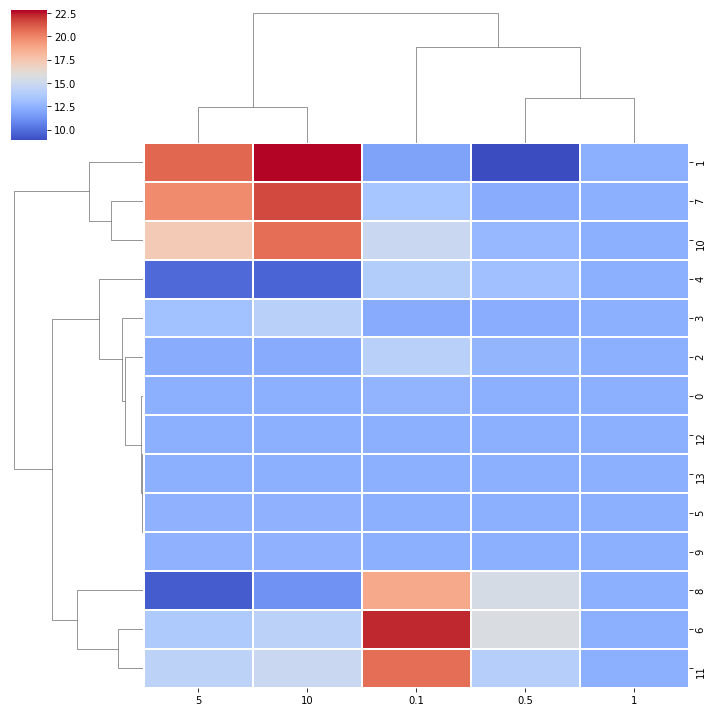

In [21]:
mae_clustermap = sb.clustermap(maes, cmap='coolwarm', linewidths=1)

## MAE Comparison

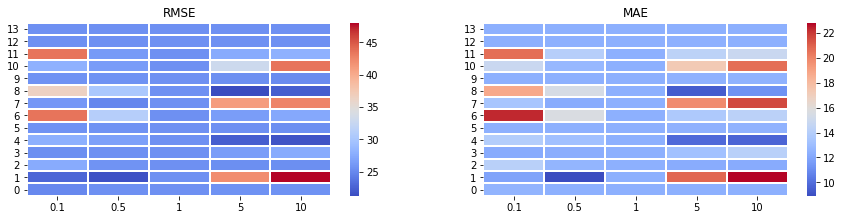

In [22]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

rmse_comp = sb.heatmap(rmses, cmap='coolwarm', linewidths=1, ax=ax1)
mae_comp = sb.heatmap(maes, cmap='coolwarm', linewidths=1, ax=ax2)
rmse_comp.invert_yaxis()
mae_comp.invert_yaxis()

ax1.title.set_text('RMSE')
ax2.title.set_text('MAE')

## Integral Difference Comparison

In [23]:
integrals_list = []
for i in range(len(default_rxn_consts)):
    integrals_list.append([])
    for j in range(5):
        integrals_list[i].append(sols[i*5 + j].integral_diff())
integral_diffs = pd.DataFrame(integrals_list, columns=['0.1', '0.5', '1', '5', '10'])
integral_diffs

,0.1,0.5,1,5,10
0,35.733274,47.841709,49.466558,50.786535,50.952566
1,155.568035,91.745109,49.466558,72.515990,119.217093
2,23.980137,46.151596,49.466558,52.237197,52.591596
3,52.591617,51.185220,49.466558,37.040510,23.980099
4,44.600755,47.014603,49.466558,70.506256,80.825608
5,50.063289,49.797982,49.466558,46.845987,43.638829
6,32.811558,2.657314,49.466558,104.474702,113.011062
7,99.848713,75.089720,49.466558,42.787367,18.145668
8,34.108395,28.399332,49.466558,123.314237,147.156718
9,50.431536,50.001084,49.466558,45.293364,40.314699


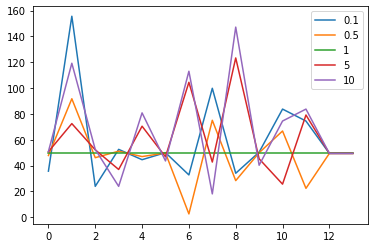

In [24]:
integral_diffs.plot()

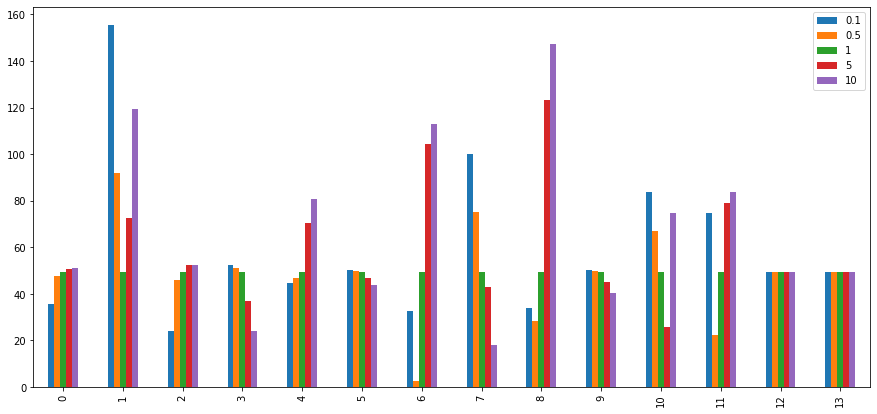

In [25]:
integral_diffs.plot.bar(figsize=(15,7))

In [26]:
integral_diffs_min = integral_diffs.agg(['min', 'idxmin']).T
integral_diffs_min

,min,idxmin
0.1,23.980137,2.0
0.5,2.657314,6.0
1,49.466558,0.0
5,25.684624,10.0
10,18.145668,7.0


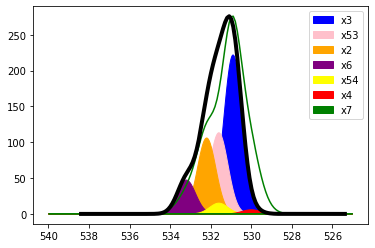

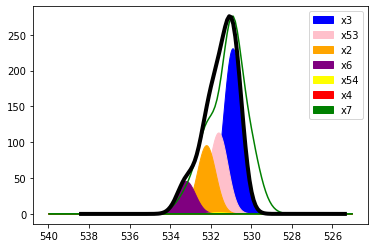

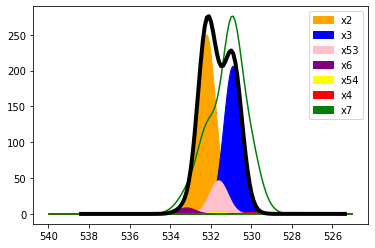

In [27]:
sols[10].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[2].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[39].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)

## Peak Comparison

In [28]:
real_max_arg = signal.argrelmax(np.array(sols[0].xps.intensity))
print(real_max_arg)
print(np.array(sols[0].xps.binding_energy)[real_max_arg])
real_peak = 531.2

(array([ 75, 110, 112]),)
[530.89 527.39 527.19]


In [30]:
peaks_list = []
for i in range(len(default_rxn_consts)):
    peaks_list.append([])
    for j in range(5):
        s = sols[i*5 + j]
        max_arg = signal.argrelmax(np.array(s.envelope))
        bes = s.resampled_binding_energies[max_arg]
        print('max arg:', max_arg)
        print('max binding energy:', bes)
        if len(bes) == 1:
            peaks_list[i].append(abs(bes[0] - real_peak))
        else:
            peaks_list[i].append(1)    
        
peaks = pd.DataFrame(peaks_list, columns=['0.1', '0.5', '1', '5', '10'])

max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([55]),)
max binding energy: [530.89]
max arg: (array([56]),)
max binding energy: [530.99]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([62]),)
max binding energy: [531.59]
max arg: (array([62]),)
max binding energy: [531.59]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [531.09]
max arg: (array([57]),)
max binding energy: [5

In [31]:
peaks

,0.1,0.5,1,5,10
0,0.11,0.11,0.11,0.11,0.11
1,0.31,0.21,0.11,0.39,0.39
2,0.11,0.11,0.11,0.11,0.11
3,0.11,0.11,0.11,0.11,0.11
4,0.11,0.11,0.11,0.21,1.00
5,0.11,0.11,0.11,0.11,0.11
6,1.00,0.11,0.11,1.00,1.00
7,1.00,0.11,0.11,1.00,1.00
8,0.19,0.01,0.11,0.21,0.31
9,0.11,0.11,0.11,0.11,0.11


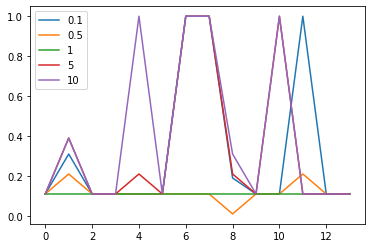

In [32]:
peaks.plot()

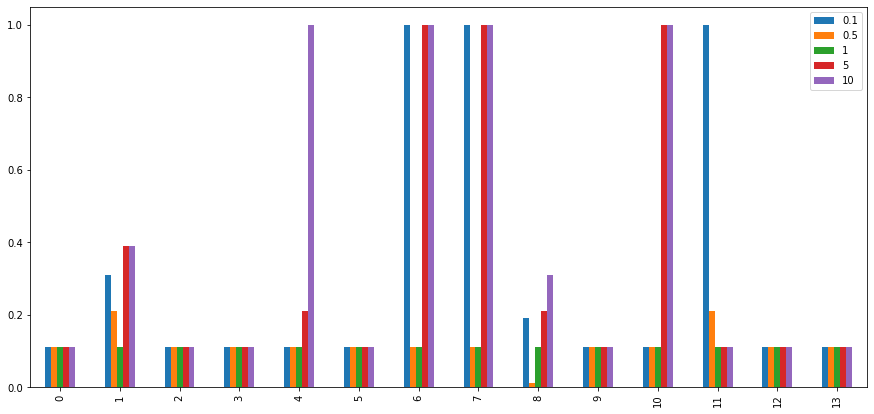

In [33]:
peaks.plot.bar(figsize=(15,7))

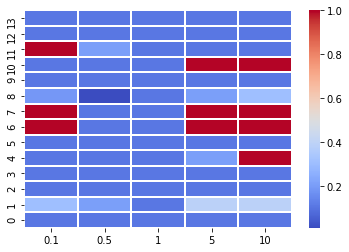

In [34]:
peaks_heatmap = sb.heatmap(peaks, cmap='coolwarm', linewidths=1)
peaks_heatmap.invert_yaxis()

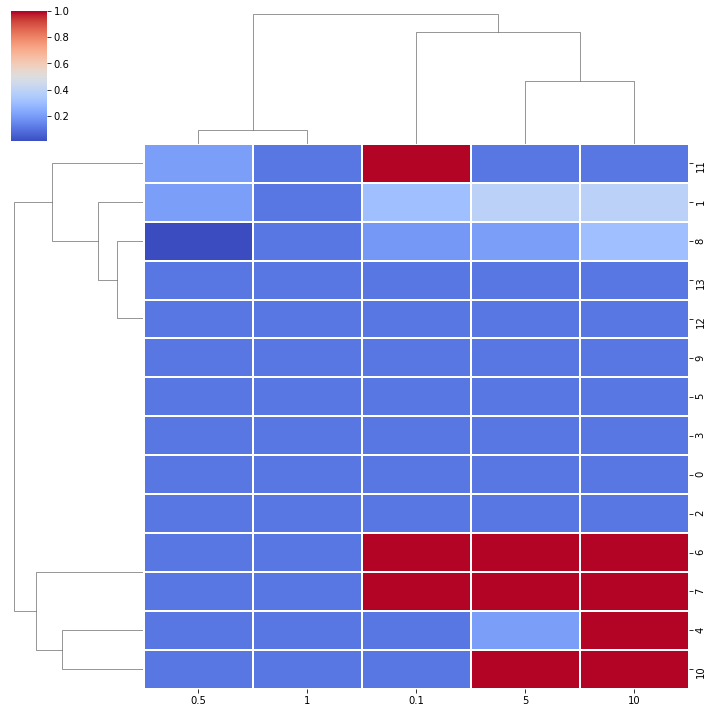

In [35]:
peaks_clustermap = sb.clustermap(peaks, cmap='coolwarm', linewidths=1)

Equations 0, 2, 3, 4, 9 , 12, 13 have the least impact on the overall system. Changes to their constant values barely affect their respective RMSEs and peak locations.

In [38]:
sols[50].names
sols[50].final_state().items()

dict_items([(x4, 0.0008887649064402507), (x7, -5.420061535783056e-07), (y1, 0.4221553858748809), (x2, 0.13928093272576714), (x3, 0.3116576906553475), (x6, 0.007904534617648933), (x53, 0.17364229306062323), (x54, 0.002510059938005285)])